In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
STABILITY = 0.00001 # to avoid overflow while dividing
network = {} # representation of network (here it is hierarchical)

In [ ]:
last_level = 4

In [ ]:
def plotall(ii):
    fig = plt.figure()
    # plot all the nodes
    for a in emb:
        plt.plot(emb[a][0], emb[a][1], marker = 'o', color = [levelOfNode[a]/(last_level+1),levelOfNode[a]/(last_level+1),levelOfNode[a]/(last_level+1)])
    # plot the relationship, black line means root level relationship
    # consecutive relationship lines fade out in color
    for a in network:
        for b in network[a]:
            plt.plot([emb[a][0], emb[b][0]], [emb[a][1], emb[b][1]], color = [levelOfNode[a]/(last_level+1),levelOfNode[a]/(last_level+1),levelOfNode[a]/(last_level+1)])
    # plt.show()
    fig.savefig(str(last_level) + '_' + str(ii) + '.png', dpi=fig.dpi)

In [ ]:
# network: the actual network of which node is connected to whom
# levelOfNode: level of the node in hierarchical data
levelOfNode = {}

In [ ]:
# recursive function to popoulate the hyponyms of a root node in `network`
# synset: the root node
# synset module of ntlk helps obtain meaning and synonym of any word
# last_level: the level till which we consider the hyponyms

def get_hyponyms(synset, level):
    if (level == last_level):
        levelOfNode[str(synset)] = level
        return
    # BFS
    # populating the network with hyponyms of a word
     
    if not str(synset) in network:
        network[str(synset)] = [str(s) for s in synset.hyponyms()]
        levelOfNode[str(synset)] = level
    for hyponym in synset.hyponyms():
        get_hyponyms(hyponym, level + 1)

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
mammal = wn.synset('mammal.n.01') # storing all hyponyms of the mammals from the wordnet mammals dataset

In [ ]:
str(mammal)

"Synset('mammal.n.01')"

In [ ]:
get_hyponyms(mammal, 0)
levelOfNode[str(mammal)] = 0

In [ ]:
# embedding of nodes of network
emb = {}

In [ ]:
network

{"Synset('aardvark.n.01')": [],
 "Synset('abrocome.n.01')": [],
 "Synset('agouti.n.01')": [],
 "Synset('anteater.n.02')": ["Synset('ant_bear.n.01')",
  "Synset('silky_anteater.n.01')",
  "Synset('tamandua.n.01')"],
 "Synset('anthropoid.n.02')": [],
 "Synset('ape.n.01')": ["Synset('anthropoid_ape.n.01')"],
 "Synset('aquatic_mammal.n.01')": ["Synset('cetacean.n.01')",
  "Synset('pinniped_mammal.n.01')",
  "Synset('sea_cow.n.01')"],
 "Synset('armadillo.n.01')": ["Synset('apar.n.01')",
  "Synset('giant_armadillo.n.01')",
  "Synset('greater_pichiciego.n.01')",
  "Synset('peba.n.01')",
  "Synset('peludo.n.01')",
  "Synset('pichiciago.n.01')",
  "Synset('tatouay.n.01')"],
 "Synset('bandicoot.n.01')": ["Synset('rabbit-eared_bandicoot.n.01')"],
 "Synset('bat.n.01')": ["Synset('carnivorous_bat.n.01')",
  "Synset('fruit_bat.n.01')"],
 "Synset('bear.n.01')": ["Synset('american_black_bear.n.01')",
  "Synset('asiatic_black_bear.n.01')",
  "Synset('bear_cub.n.01')",
  "Synset('brown_bear.n.01')",
  "

In [ ]:
# Randomly assigning 2d arrays to the words

for a in network:
    for b in network[a]: 
        emb[b] = np.random.uniform(low=-0.001, high=0.001, size=(2,))
    emb[a] = np.random.uniform(low=-0.001, high=0.001, size=(2,))

In [ ]:
emb

{"Synset('aardvark.n.01')": array([-0.00019234,  0.00073608]),
 "Synset('abrocome.n.01')": array([1.56936608e-04, 6.84571116e-05]),
 "Synset('aegyptopithecus.n.01')": array([-0.00075263, -0.0006139 ]),
 "Synset('african_elephant.n.01')": array([-8.11448858e-04, -4.49704903e-05]),
 "Synset('agouti.n.01')": array([-2.0332258e-05, -6.9978124e-04]),
 "Synset('algeripithecus_minutus.n.01')": array([ 0.00032051, -0.00067249]),
 "Synset('american_black_bear.n.01')": array([3.01528467e-05, 6.54558212e-04]),
 "Synset('american_flying_squirrel.n.01')": array([-0.00041086,  0.00081958]),
 "Synset('american_harvest_mouse.n.01')": array([-0.00094721, -0.00082872]),
 "Synset('american_mastodon.n.01')": array([-0.00053469,  0.00085069]),
 "Synset('angwantibo.n.01')": array([0.00022819, 0.00062838]),
 "Synset('ant_bear.n.01')": array([-0.00037832, -0.00084227]),
 "Synset('anteater.n.02')": array([ 3.06447212e-05, -1.69814454e-04]),
 "Synset('anthropoid.n.02')": array([ 0.00062841, -0.00043149]),
 "Syn

In [ ]:
vocab = list(emb.keys())
vocab

["Synset('female_mammal.n.01')",
 "Synset('fossorial_mammal.n.01')",
 "Synset('metatherian.n.01')",
 "Synset('placental.n.01')",
 "Synset('prototherian.n.01')",
 "Synset('tusker.n.01')",
 "Synset('mammal.n.01')",
 "Synset('damaraland_mole_rat.n.01')",
 "Synset('naked_mole_rat.n.01')",
 "Synset('queen.n.09')",
 "Synset('marsupial.n.01')",
 "Synset('bandicoot.n.01')",
 "Synset('dasyurid_marsupial.n.01')",
 "Synset('kangaroo.n.01')",
 "Synset('opossum.n.02')",
 "Synset('opossum_rat.n.01')",
 "Synset('phalanger.n.01')",
 "Synset('pouched_mole.n.01')",
 "Synset('wombat.n.01')",
 "Synset('rabbit-eared_bandicoot.n.01')",
 "Synset('dasyure.n.01')",
 "Synset('numbat.n.01')",
 "Synset('pouched_mouse.n.01')",
 "Synset('tasmanian_devil.n.01')",
 "Synset('thylacine.n.01')",
 "Synset('giant_kangaroo.n.01')",
 "Synset('musk_kangaroo.n.01')",
 "Synset('rat_kangaroo.n.01')",
 "Synset('wallaby.n.01')",
 "Synset('common_opossum.n.01')",
 "Synset('crab-eating_opossum.n.01')",
 "Synset('brush-tailed_phalan

In [ ]:
random.shuffle(vocab)

In [ ]:
# the leave nodes are not connected to anything
for a in emb:
    if not a in network:
        network[a] = []

## Poincare Embeddings

There are many different models of hyperbolic space, but we focus on the Poincaré Ball model (in two dimensions, this is the Poincaré disk). We first consider the Euclidean open unit-ball in d-dimensions.

$$
\mathcal{B}^{d}=\left\{\boldsymbol{x} \in \mathbb{R}^{d} |\|\boldsymbol{x}\|<1\right\}
$$

The Poincaré ball in hyperbolic space is the Riemannian manifold $\left(\mathcal{B}^{d}, g_{\boldsymbol{x}}\right)$ with Riemannian metric tensor <br>

$$
g_{\boldsymbol{x}}=\left(\frac{2}{1-\|\boldsymbol{x}\|^{2}}\right)^{2} g^{E}
$$<br>
where $x \in \mathcal{B}^{d}$ and $g^{E}$ is the Euclidean metric tensor.

We have the symmetric distance function for $\boldsymbol{u}, \boldsymbol{v} \in \mathcal{B}^{d}$:

$$
d(\boldsymbol{u}, \boldsymbol{v})=\operatorname{arcosh}\left(1+2 \frac{\|\boldsymbol{u}-\boldsymbol{v}\|^{2}}{\left(1-\|\boldsymbol{u}\|^{2}\right)\left(1-\|\boldsymbol{v}\|^{2}\right)}\right)
$$

To embed the data $x_1, ..., x_n$ in the Poincaré ball, we find <br>
$\Theta=\left\{\boldsymbol{\theta}_{i}\right\}_{i=1}^{n},$ where $\boldsymbol{\theta}_{i} \in \mathcal{B}^{d}$ <br>
<br>
The Riemannian manifold structure allows us to use gradient based optimization and find the optimal embeddings for some problem-specific loss function $\mathcal{L}(\Theta)$: <br>
<br>
$$
\Theta^{\prime} \leftarrow \underset{\Theta}{\arg \min } \mathcal{L}(\Theta) \quad \text { s.t. } \forall \theta_{i} \in \Theta :\left\|\theta_{i}\right\|<1
$$

Let $\mathcal{T}_{\theta} \mathcal{B}$ be the tangent space for some $\theta \in \mathcal{B}^d$ <br>
and let $\nabla_{R} \in \mathcal{T}_{\theta} \mathcal{B}$ be the Riemannian gradient of $\mathcal{L}(\Theta)$

We have the parameter update rule given by: <br>

$$
\boldsymbol{\theta}_{t+1}=\mathfrak{R}_{\theta_{t}}\left(-\eta_{t} \nabla_{R} \mathcal{L}\left(\boldsymbol{\theta}_{t}\right)\right)
$$ <br>
where $\mathfrak{R}_{\theta_{t}}$ is the retraction onto $\mathcal{B}^d$ and $\eta$ is the learning rate
$$
\mathfrak{R}_{\theta}(\boldsymbol{v})=\boldsymbol{\theta}+\boldsymbol{v}
$$

We'd like to write the Riemannian gradient in terms of the Euclidean gradient ($ \nabla_{E} $) where <br>
<br>
$$
\nabla_{E}=\frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial d(\boldsymbol{\theta}, \boldsymbol{x})} \frac{\partial d(\boldsymbol{\theta}, \boldsymbol{x})}{\partial \boldsymbol{\theta}}
$$ <br>
and we assume the problem-specific loss function $\mathcal{L}(\boldsymbol{\theta}$ is known

Then, to find the partial derivatives of the Poincaré distance, we define the following:
$$
\alpha=1-\|\boldsymbol{\theta}\|^{2}
$$
$$
\beta=1-\|\boldsymbol{x}\|^{2}
$$
$$
\gamma=1+\frac{2}{\alpha \beta}\|\boldsymbol{\theta}-\boldsymbol{x}\|^{2}
$$
<br>
and we can write the partial derivative<br>
<br>
$$
\frac{\partial d(\boldsymbol{\theta}, \boldsymbol{x})}{\partial \boldsymbol{\theta}}=\frac{4}{\beta \sqrt{\gamma^{2}-1}}\left(\frac{\|\boldsymbol{x}\|^{2}-2\langle\boldsymbol{\theta}, \boldsymbol{x}\rangle+ 1}{\alpha^{2}} \boldsymbol{\theta}-\frac{\boldsymbol{x}}{\alpha}\right)
$$

Finally, we write the update rule in terms of Euclidean gradient $\nabla_{E}$ of the <br>
loss function and set $\epsilon$ to constrain the embeddings within the Poincaré ball: <br>
<br>
$$
\operatorname{proj}(\boldsymbol{\theta})=\left\{\begin{array}{ll}{\boldsymbol{\theta} /\|\boldsymbol{\theta}\|-\varepsilon} & {\text { if }\|\boldsymbol{\theta}\| \geq 1} \\ {\boldsymbol{\theta}} & {\text { otherwise }}\end{array}\right.
$$ <br>
and using partial derivatives of Poincaré distance we have:<br>
<br>
$$
\boxed{\boldsymbol{\theta}_{t+1} \leftarrow \operatorname{proj}\left(\boldsymbol{\theta}_{t}-\eta_{t} \frac{\left(1-\left\|\boldsymbol{\theta}_{t}\right\|^{2}\right)^{2}}{4} \nabla_{E}\right)}
$$

In [ ]:
# Partial derivative as given above

def partial_der(theta, x, gamma): 
    alpha = (1.0-np.dot(theta, theta))
    norm_x = np.dot(x, x)
    beta = (1-norm_x)
    gamma = gamma
    return 4.0/(beta * sqrt(gamma*gamma - 1) + STABILITY)*((norm_x- 2*np.dot(theta, x)+1)/(pow(alpha,2)+STABILITY)*theta - x/(alpha + STABILITY))

In [ ]:
# defining the learning rate
lr=0.01

In [ ]:
# the update equation as given above
def update(emb, error_): 
    try:
        update =  lr*pow((1 - np.dot(emb,emb)), 2)*error_/4
        emb = emb - update
        if (np.dot(emb, emb) >= 1):
            emb = emb/sqrt(np.dot(emb, emb)) - STABILITY
        return emb
    except Exception as e:
        print (e)

In [ ]:
# Distance in poincare disk model

def dist(vec1, vec2):
    return 1 + 2*np.dot(vec1 - vec2, vec1 - vec2)/ \
             ((1-np.dot(vec1, vec1))*(1-np.dot(vec2, vec2)) + STABILITY)

In [ ]:
num_negs = 5

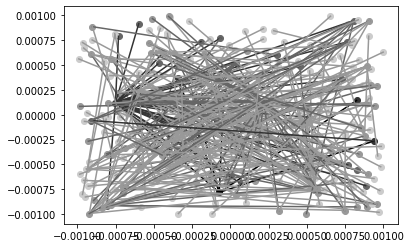

In [ ]:
# The plot of initialized embeddings
plotall("init")

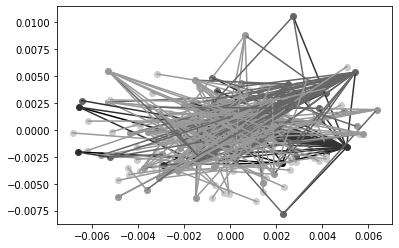

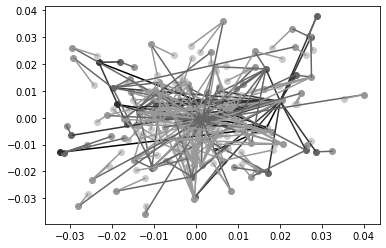

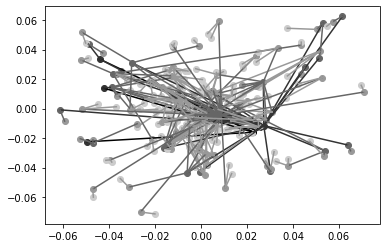

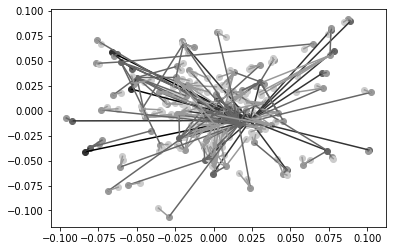

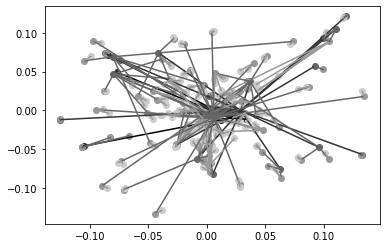

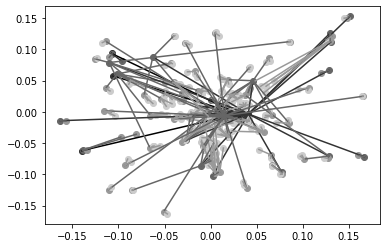

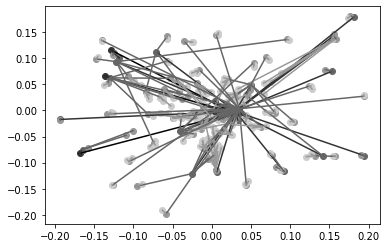

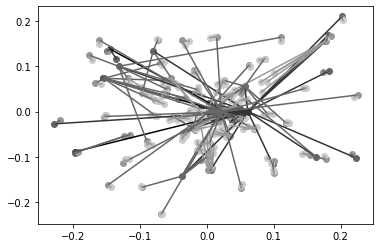

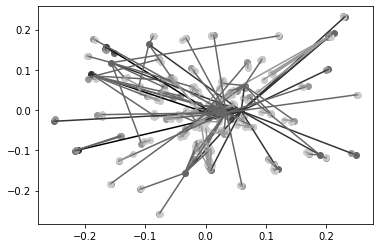

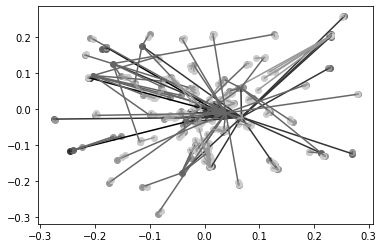

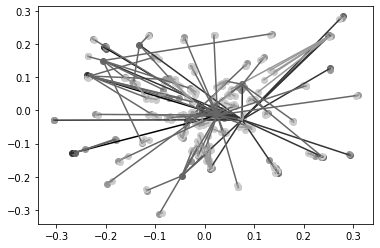

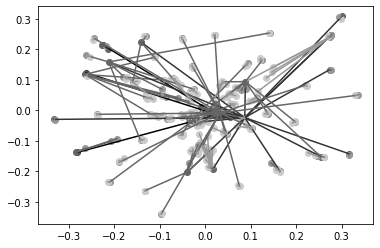

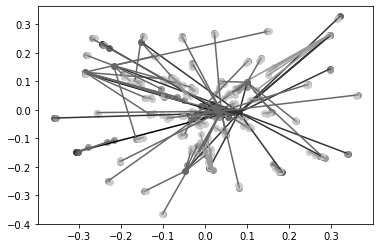

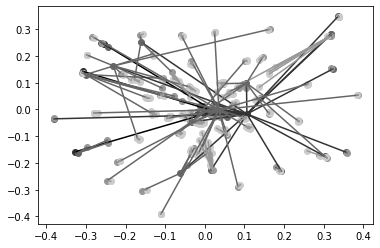

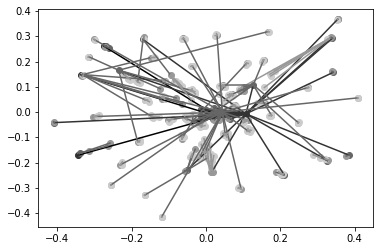

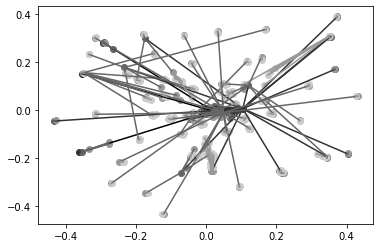

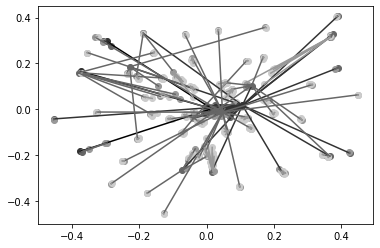

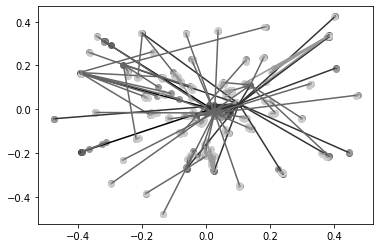

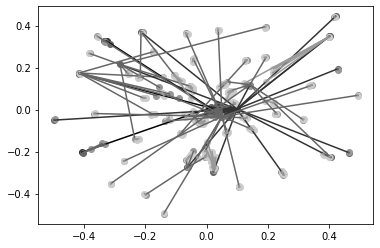

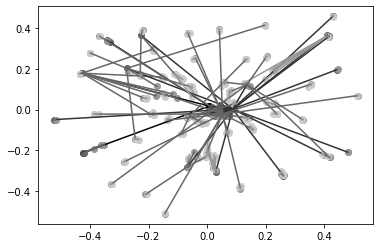

In [ ]:
for epoch in range(200):
    # pos2 is related to pos1
    # negs are not related to pos1
    for pos1 in vocab:
        if not network[pos1]: # continue plotting until you encounter a leaf node
            continue
        pos2 = random.choice(network[pos1]) # pos2 and pos1 are related
        dist_p_init = dist(emb[pos1], emb[pos2]) # distance between the related nodes
        if (dist_p_init > 700): # this causes overflow, so I clipped it here
            print ("got one very high") # if you have reached this zone, the training is unstable now
            dist_p_init = 700
        elif (dist_p_init < -700):
            print ("got one very high")
            dist_p_init = -700
        dist_p = cosh(dist_p_init) # this is the actual distance, it is always positive
        
        negs = [] # pairs of not related nodes, the first node in the pair is `pos1`
        dist_negs_init = [] # distances without taking cosh on it (for unrelated nodes)
        dist_negs = [] # distances with taking cosh on it (for unrelated nodes)

        while (len(negs) < num_negs): # take upto 5 negative samples
            neg1 = pos1
            neg2 = random.choice(vocab)
            if not (neg2 in network[neg1] or neg1 in network[neg2] or neg2 == neg1): # neg2 should not be related to neg1 and vice versa
                dist_neg_init = dist(emb[neg1], emb[neg2])
                if (dist_neg_init > 700 or dist_neg_init < -700): # already dist is good, leave it
                    continue
                negs.append([neg1, neg2])
                dist_neg = cosh(dist_neg_init)
                dist_negs_init.append(dist_neg_init) # saving it for faster computation
                dist_negs.append(dist_neg)

        loss_den = 0.0

        # loss function for negative samples
        for dist_neg in dist_negs:
            loss_den += exp(-1*dist_neg)
        loss = -1*dist_p - log(loss_den + STABILITY)

        # derivative of loss wrt positive relation [d(u, v)]
        der_p = -1
        
        der_negs = []

        # derivative of loss wrt negative relation [d(u, v')]
        for dist_neg in dist_negs:
            der_negs.append(exp(-1*dist_neg)/(loss_den + STABILITY))

        # derivative of loss wrt pos1
        der_p_pos1 = der_p * partial_der(emb[pos1], emb[pos2], dist_p_init)

        # derivative of loss wrt pos2
        der_p_pos2 = der_p * partial_der(emb[pos2], emb[pos1], dist_p_init)
        der_negs_final = []

        for (der_neg, neg, dist_neg_init) in zip(der_negs, negs, dist_negs_init):

            # derivative of loss wrt second element of the pair in neg
            der_neg1 = der_neg * partial_der(emb[neg[1]], emb[neg[0]], dist_neg_init)

            # derivative of loss wrt first element of the pair in neg
            der_neg0 = der_neg * partial_der(emb[neg[0]], emb[neg[1]], dist_neg_init)
            der_negs_final.append([der_neg0, der_neg1])

        # update embeddings now
        emb[pos1] = update(emb[pos1], -1*der_p_pos1)
        emb[pos2] = update(emb[pos2], -1*der_p_pos2)
        for (neg, der_neg) in zip(negs, der_negs_final):
            emb[neg[0]] = update(emb[neg[0]], -1*der_neg[0])
            emb[neg[1]] = update(emb[neg[1]], -1*der_neg[1])

    # plot the embeddings
    if ((epoch)%5 == 0):
        plotall(epoch+1)